In [1]:
import os

# home_dir = '/content/gdrive/My Drive/AChina' 
# home_dir = '/hy-tmp'
# os.chdir(home_dir)
# pwd

!pip install tqdm 
!pip install fire

from glob import glob
from tqdm import tqdm

import numpy as np
import pandas as pd

import os
import warnings
import sys

import fire

# warnings.filterwarnings("ignore")  # avoid printing out absolute paths

# os.chdir("../../..")

!pip install scipy
!pip install torch 
!pip install pytorch_lightning==1.9.0 pytorch_forecasting

import copy
from pathlib import Path
import warnings

import time

import numpy as np
import pandas as pd
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_lightning.loggers import TensorBoardLogger
import torch

from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import MAPE, SMAPE, PoissonLoss, QuantileLoss
from matplotlib import pyplot as plt
from pytorch_lightning.utilities.model_summary import summarize
from pytorch_forecasting import TemporalFusionTransformer
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt

from multiprocessing import Pool, freeze_support

Looking in indexes: https://mirrors.aliyun.com/pypi/simple
You should consider upgrading via the '/usr/bin/python3.8 -m pip install --upgrade pip' command.
Looking in indexes: https://mirrors.aliyun.com/pypi/simple
You should consider upgrading via the '/usr/bin/python3.8 -m pip install --upgrade pip' command.
Looking in indexes: https://mirrors.aliyun.com/pypi/simple
You should consider upgrading via the '/usr/bin/python3.8 -m pip install --upgrade pip' command.
Looking in indexes: https://mirrors.aliyun.com/pypi/simple
You should consider upgrading via the '/usr/bin/python3.8 -m pip install --upgrade pip' command.
Looking in indexes: https://mirrors.aliyun.com/pypi/simple
You should consider upgrading via the '/usr/bin/python3.8 -m pip install --upgrade pip' command.


/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
home_dir = '/hy-tmp'        
os.chdir(home_dir)

!pwd

!ls

# from google.colab import drive
# drive.mount('/content/gdrive/')

# !ls

# home_dir = '/content/gdrive/My Drive/AChina'        
# os.chdir(home_dir)
# !pwd

/hy-tmp
ALIM128F64DATASET_rice.csv  ali_rice.ckpt  china


In [3]:
scrop = 'rice'

MOD_BINS = 128
FAM_BINS = 64

print( time.asctime( time.localtime(time.time()) ) )
alidata = pd.read_csv(f'./ALIM{MOD_BINS}F{FAM_BINS}DATASET_{scrop}.csv')
print('DATASET loaded', time.asctime( time.localtime(time.time()) ) )

del alidata['Unnamed: 0']
del alidata['Unnamed: 0.1']
del alidata['Unnamed: 0.2']
del alidata['Unnamed: 0.1.1.1']

alidata['county'] = alidata['county'].astype(str)
alidata['year']   = alidata['year'].astype(str)

display(alidata)

Sat Mar  4 16:35:24 2023
DATASET loaded Sat Mar  4 16:35:42 2023


,month,MOD_month_t,time_idx,county,year,b0b0,b0b1,b0b2,b0b3,b0b4,...,Wind_f_tavg_53,Wind_f_tavg_54,Wind_f_tavg_55,Wind_f_tavg_56,Wind_f_tavg_57,Wind_f_tavg_58,Wind_f_tavg_59,Wind_f_tavg_60,Wind_f_tavg_61,Wind_f_tavg_62
0,1,0,0,0,2003,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,0,2003,0.000000,0.000000,0.301030,0.602060,0.903090,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2,2,0,2003,0.000000,0.000000,0.000000,0.000000,0.845098,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,0,3,0,2003,0.000000,0.000000,0.000000,0.845098,1.301030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,1,4,0,2003,0.000000,0.000000,0.000000,0.301030,0.477121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23755,11,1,39,30,2022,1.230449,2.808886,2.950365,3.116276,3.160168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23756,11,2,40,30,2022,1.505150,2.453318,3.107210,3.297979,3.459694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23757,12,0,41,30,2022,0.845098,0.954243,1.113943,1.556303,2.334454,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23758,12,1,42,30,2022,1.602060,0.477121,1.176091,0.954243,1.724276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# aliv = alidata[ alidata['year'] == '2004']
# alio = alidata[ alidata['year'] == '2003']

# months = alidata['month'].unique()

# for month in months:
#     display(aliv[ aliv['month'] == month ])
#     display(alio[ alio['month'] == month ])
               
# fn

In [5]:
infer_mask = alidata['year'].isin(['2019', '2020', '2021', '2022'])

data_infer = alidata[infer_mask]

data_infer['rice_sownarea'] = np.nan
data_infer['rice_yieldval'] = np.nan
data_infer['rice_yield']    = np.nan

years = [str(x) for x in range(2003, 2005)]

val_year = str(2004)

years.remove(val_year)

train_mask = alidata['year'].isin(years)
data = alidata[train_mask]

val_mask = alidata['year'].isin([val_year])
data_val = alidata[val_mask]

display(data_infer)

display(data)

display(data_val)


/tmp/ipykernel_243538/4126882813.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_infer['rice_sownarea'] = np.nan
/tmp/ipykernel_243538/4126882813.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_infer['rice_yieldval'] = np.nan
/tmp/ipykernel_243538/4126882813.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,month,MOD_month_t,time_idx,county,year,b0b0,b0b1,b0b2,b0b3,b0b4,...,Wind_f_tavg_53,Wind_f_tavg_54,Wind_f_tavg_55,Wind_f_tavg_56,Wind_f_tavg_57,Wind_f_tavg_58,Wind_f_tavg_59,Wind_f_tavg_60,Wind_f_tavg_61,Wind_f_tavg_62
19008,1,0,0,0,2019,0.000000,0.000000,0.000000,0.845098,1.544068,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19009,1,1,1,0,2019,0.000000,0.000000,0.000000,0.477121,1.414973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19010,1,2,2,0,2019,0.000000,0.000000,0.000000,0.000000,1.278754,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19011,2,0,3,0,2019,0.000000,0.000000,0.301030,1.301030,1.812913,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19012,2,1,4,0,2019,0.000000,0.000000,0.000000,0.301030,1.322219,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23755,11,1,39,30,2022,1.230449,2.808886,2.950365,3.116276,3.160168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23756,11,2,40,30,2022,1.505150,2.453318,3.107210,3.297979,3.459694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23757,12,0,41,30,2022,0.845098,0.954243,1.113943,1.556303,2.334454,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23758,12,1,42,30,2022,1.602060,0.477121,1.176091,0.954243,1.724276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,month,MOD_month_t,time_idx,county,year,b0b0,b0b1,b0b2,b0b3,b0b4,...,Wind_f_tavg_53,Wind_f_tavg_54,Wind_f_tavg_55,Wind_f_tavg_56,Wind_f_tavg_57,Wind_f_tavg_58,Wind_f_tavg_59,Wind_f_tavg_60,Wind_f_tavg_61,Wind_f_tavg_62
0,1,0,0,0,2003,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,0,2003,0.000000,0.000000,0.301030,0.602060,0.903090,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2,2,0,2003,0.000000,0.000000,0.000000,0.000000,0.845098,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,0,3,0,2003,0.000000,0.000000,0.000000,0.845098,1.301030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,1,4,0,2003,0.000000,0.000000,0.000000,0.301030,0.477121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,11,1,39,30,2003,0.778151,0.903090,1.342423,2.103804,2.747412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1184,11,2,40,30,2003,1.342423,1.113943,1.903090,2.510545,2.741939,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1185,12,0,41,30,2003,1.361728,0.698970,1.505150,2.136721,2.283301,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1186,12,1,42,30,2003,0.477121,0.778151,2.127105,2.396199,2.551450,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,month,MOD_month_t,time_idx,county,year,b0b0,b0b1,b0b2,b0b3,b0b4,...,Wind_f_tavg_53,Wind_f_tavg_54,Wind_f_tavg_55,Wind_f_tavg_56,Wind_f_tavg_57,Wind_f_tavg_58,Wind_f_tavg_59,Wind_f_tavg_60,Wind_f_tavg_61,Wind_f_tavg_62
1188,1,0,0,0,2004,0.000000,0.000000,0.000000,0.778151,1.146128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1189,1,1,1,0,2004,0.000000,0.000000,0.000000,1.079181,1.230449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1190,1,2,2,0,2004,0.000000,0.000000,0.000000,0.602060,1.301030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1191,2,0,3,0,2004,0.000000,0.000000,0.000000,0.000000,0.778151,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1192,2,1,4,0,2004,0.000000,0.000000,0.000000,0.000000,0.778151,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,11,1,39,30,2004,1.204120,1.913814,2.506505,3.030195,3.340047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2372,11,2,40,30,2004,1.361728,1.342423,2.539076,3.032619,3.295787,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2373,12,0,41,30,2004,1.568202,2.404834,2.499687,2.541579,2.694605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2374,12,1,42,30,2004,1.000000,0.778151,1.995635,2.220108,2.535294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
max_prediction_length = 3
max_encoder_length = 32
training_cutoff = data["time_idx"].max() - max_prediction_length

avg_med = ["avg_rice_yield", "med_rice_yield", "avg_rice_sownarea", "med_rice_sownarea",\
                 "avg_rice_yieldval", "med_rice_yieldval"]

_static_reals = avg_med

_time_varying_known_reals = ["time_idx"]
_time_varying_known_reals.extend(avg_med)

# display( data[ [ col for col in _time_varying_known_reals ] ] )

# fn

mod_names = [f'b{iband}b{bins}' for iband in range(9) for bins in range(MOD_BINS)]

famine_list = ['Evap_tavg', 'LWdown_f_tavg', 'Lwnet_tavg', 'Psurf_f_tavg', 'Qair_f_tavg', 'Qg_tavg', 'Qh_tavg', 'Qle_tavg',\
            'Qs_tavg', 'Qsb_tavg', 'RadT_tavg', 'Rainf_f_tavg', 'SnowCover_inst', 'SnowDepth_inst', 'Snowf_tavg', \
            'SoilMoi00_10cm_tavg', 'SoilMoi10_40cm_tavg', 'SoilMoi40_100cm_tavg', \
            'SoilTemp00_10cm_tavg', 'SoilTemp10_40cm_tavg', 'SoilTemp40_100cm_tavg', \
            'SWdown_f_tavg', 'SWE_inst', 'Swnet_tavg', 'Tair_f_tavg', 'Wind_f_tavg']

nbins = ['_' + str(x) for x in range(0, FAM_BINS - 1)]

famine_names = [famine + bb for famine in famine_list for bb in nbins]

_time_varying_unknown_reals = []
_time_varying_unknown_reals.extend(avg_med)
_time_varying_unknown_reals.extend(mod_names)
_time_varying_unknown_reals.extend(famine_names)

# display( data[ [ col for col in _time_varying_unknown_reals ] ] )

# fn

# display( data[ [ col for col in mod_names ] ] )

# display( data[ [ col for col in famine_names ] ] )

# fn

print( time.asctime( time.localtime(time.time()) ) )

training = TimeSeriesDataSet(
    data[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="rice_yield",
    group_ids=["county", "year"],
    min_encoder_length=max_encoder_length // 2,  # keep encoder length long (as it is in the validation set)
    max_encoder_length=max_encoder_length,
    min_prediction_length = 1,
    max_prediction_length = max_prediction_length,
    # static_categoricals = ["county", "years"],
    # static_reals = _static_reals,
    # time_varying_known_categoricals=["special_days", "month"],
    # variable_groups={"special_days": special_days},  # group of categorical variables can be treated as one variable
    time_varying_known_reals = _time_varying_known_reals,
    # time_varying_unknown_categoricals=[],
    time_varying_unknown_reals = _time_varying_unknown_reals,
    # target_normalizer=GroupNormalizer(
    #     groups=["agency", "sku"], transformation="softplus"
    # ),  # use softplus and normalize by group
    add_relative_time_idx=True,
    # add_target_scales=True,
    add_encoder_length=True,
)

print( time.asctime( time.localtime(time.time()) ) )

validation = TimeSeriesDataSet(
    data_val[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="rice_yield",
    group_ids=["county", "year"],
    min_encoder_length=max_encoder_length // 2,  # keep encoder length long (as it is in the validation set)
    max_encoder_length=max_encoder_length,
    min_prediction_length = 1,
    max_prediction_length = max_prediction_length,
    # static_categoricals = ["county", "years"],
    # static_reals = _static_reals,
    # time_varying_known_categoricals=["special_days", "month"],
    # variable_groups={"special_days": special_days},  # group of categorical variables can be treated as one variable
    time_varying_known_reals = _time_varying_known_reals,
    # time_varying_unknown_categoricals=[],
    time_varying_unknown_reals = _time_varying_unknown_reals,
    # target_normalizer=GroupNormalizer(
    #     groups=["agency", "sku"], transformation="softplus"
    # ),  # use softplus and normalize by group
    add_relative_time_idx=True,
    # add_target_scales=True,
    add_encoder_length=True,
)

# create validation set (predict=True) which means to predict the last max_prediction_length points in time
# for each series
# validation = TimeSeriesDataSet.from_dataset(training, data, predict=True, stop_randomization=True)

print( time.asctime( time.localtime(time.time()) ) )


Sat Mar  4 16:35:43 2023


/usr/local/lib/python3.8/dist-packages/pytorch_forecasting/data/encoders.py:899: UserWarning: scale is below 1e-7 - consider not centering the data or using data with higher variance for numerical stability
  warnings.warn(


Sat Mar  4 16:36:01 2023


/usr/local/lib/python3.8/dist-packages/pytorch_forecasting/data/encoders.py:899: UserWarning: scale is below 1e-7 - consider not centering the data or using data with higher variance for numerical stability
  warnings.warn(


Sat Mar  4 16:36:19 2023


In [7]:
print(data['b0b10'].dtypes)
print(data['Evap_tavg_10'].dtypes)

float64
float64


In [8]:
# create dataloaders for model
batch_size = 64  # set this between 32 to 128
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=8)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=8)

In [9]:
print( time.asctime( time.localtime(time.time()) ) )
# calculate baseline mean absolute error, i.e. predict next value as the last available value from the history
# for x, (y, weight) in iter(val_dataloader):
#     print(type(y), y.size())
    
actuals = torch.cat([y for x, (y, weight) in iter(val_dataloader)])
baseline_predictions = Baseline().predict(val_dataloader)
(actuals - baseline_predictions).abs().mean().item()
print('Baseline:', time.asctime( time.localtime(time.time()) ) )

Sat Mar  4 16:36:19 2023


/usr/local/lib/python3.8/dist-packages/pytorch_lightning/utilities/parsing.py:262: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/utilities/parsing.py:262: UserWarning: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
  rank_zero_warn(


Baseline: Sat Mar  4 16:37:14 2023


In [10]:
dir = '/hy-tmp/chck/ali'
dir = os.path.join(home_dir, 'data')
checkpoint_callback = ModelCheckpoint(dirpath=dir + 'ali', every_n_epochs=1)

dir = '/tf_logs'
dir = os.path.join(home_dir, 'data')
logger = TensorBoardLogger(dir, name='ali', comment='ali')

lr_monitor = LearningRateMonitor(logging_interval='epoch')

trainer = Trainer(accelerator='gpu', logger=logger, log_every_n_steps=1, fast_dev_run=True, max_epochs=30, \
                  callbacks=[checkpoint_callback, lr_monitor])

learning_rate = 0.001

model = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=learning_rate,
    # # lstm_layers=2,
    hidden_size=16,
    # attention_head_size=4,
    # dropout=0.1,
    # hidden_continuous_size=8,
    # output_size=7,  # 7 quantiles by default
    # loss=RMSE(),
    loss=QuantileLoss(),
    # log_interval=10,  # uncomment for learning rate finder and otherwise, e.g. to 10 for logging every 10 batches
    # reduce_on_plateau_patience=4,
    )

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.


In [11]:
print( time.asctime( time.localtime(time.time()) ) )
trainer.fit(
    model,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)
print('fit:', time.asctime( time.localtime(time.time()) ) )

You are using a CUDA device ('NVIDIA GeForce RTX 3070 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision


Sat Mar  4 16:37:20 2023


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 0     
3  | prescalers                         | ModuleDict                      | 44.8 K
4  | static_variable_selection          | VariableSelectionNetwork        | 528   
5  | encoder_variable_selection         | VariableSelectionNetwork        | 1.9 M 
6  | decoder_variable_selection         | VariableSelectionNetwork        | 5.1 K 
7  | static_context_variable_selection  | GatedResidualNetwork            | 1.1 K 
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 1.1 K 
9  | static_context_initial_cell_lstm 

Epoch 0:  50%|█████     | 1/2 [00:26<00:26, 26.43s/it, loss=7.6e-08, v_num=, train_loss_step=7.6e-8]
Validation: 0it [00:00, ?it/s]
Epoch 0: 100%|██████████| 2/2 [00:45<00:00, 22.71s/it, loss=7.6e-08, v_num=, train_loss_step=7.6e-8, val_loss=1.690, train_loss_epoch=7.6e-8]

`Trainer.fit` stopped: `max_steps=1` reached.


Epoch 0: 100%|██████████| 2/2 [00:45<00:00, 22.71s/it, loss=7.6e-08, v_num=, train_loss_step=7.6e-8, val_loss=1.690, train_loss_epoch=7.6e-8]
fit: Sat Mar  4 16:38:25 2023


In [12]:
# load the best model according to the validation loss
# (given that we use early stopping, this is not necessarily the last epoch)
# os.chdir(os.path.join(home_dir, 'data'))
#   best_model_path = trainer.checkpoint_callback.best_model_path
# print(type(best_model_path))
# best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

print('weights saving', time.asctime( time.localtime(time.time()) ) )
checkpoint = f"ali_{scrop}.ckpt"
trainer.save_checkpoint(checkpoint)
print('weights loading', time.asctime( time.localtime(time.time()) ) )
best_tft = model  # TemporalFusionTransformer.load_from_checkpoint(checkpoint)
print('weights loaded', time.asctime( time.localtime(time.time()) ) )

weights saving Sat Mar  4 16:38:25 2023
weights loading Sat Mar  4 16:38:37 2023
weights loaded Sat Mar  4 16:38:37 2023


In [13]:
# calcualte mean absolute error on validation set
actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])
predictions = best_tft.predict(val_dataloader)
(actuals - predictions).abs().mean()

tensor(nan)

In [14]:
print(type(actuals), actuals.device, actuals.size(), actuals.size()[0])
print(type(predictions), predictions.device, predictions.size())

print(actuals[0,0], predictions[0,0])

# for county in range(actuals.size()[0]):
#     # print(actuals[county,:], predictions[county,:])
#     fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,5))
#     ax.plot(actuals[county, :], color='r')
#     ax.plot(predictions[county, :], color='b')

# plt.show()

<class 'torch.Tensor'> cpu torch.Size([1161, 3]) 1161
<class 'torch.Tensor'> cpu torch.Size([1161, 3])
tensor(1.2317) tensor(3.4271)


In [15]:
# raw predictions are a dictionary from which all kind of information including quantiles can be extracted
raw_predictions, x = best_tft.predict(val_dataloader, mode="raw", return_x=True)

/usr/local/lib/python3.8/dist-packages/pytorch_forecasting/models/base_model.py:92: UserWarning: Not all dimensions are equal for tensors shapes. Example tensor torch.Size([64, 3, 4, 32]). Returning list instead of torch.Tensor.
  warnings.warn(


In [16]:
print(type(raw_predictions))

<class 'pytorch_forecasting.utils.TupleOutputMixIn.to_network_output.<locals>.Output'>


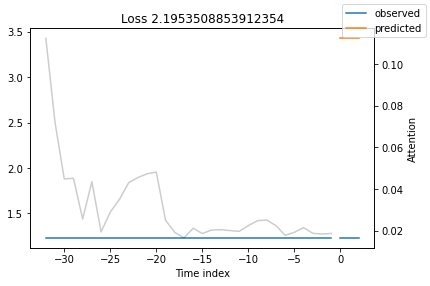

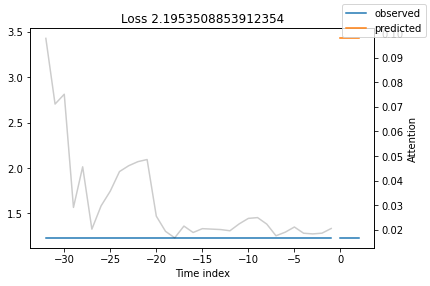

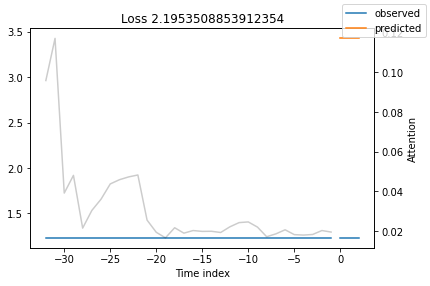

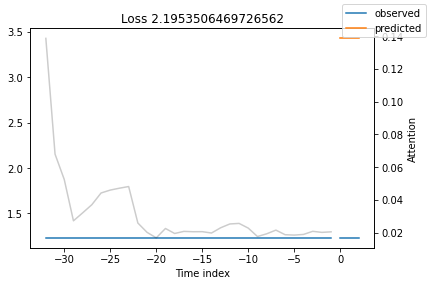

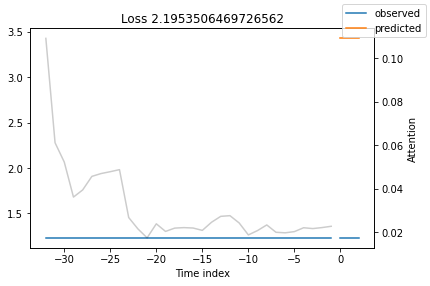

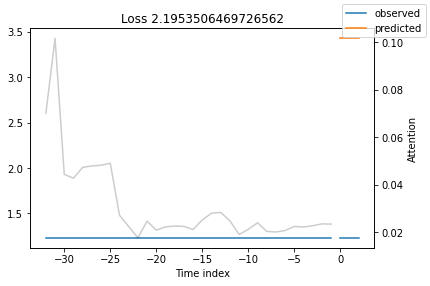

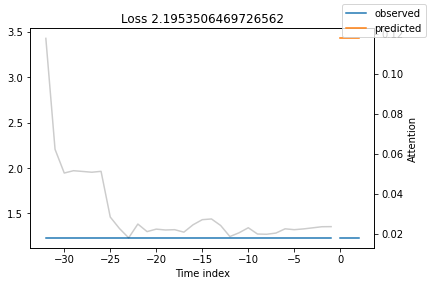

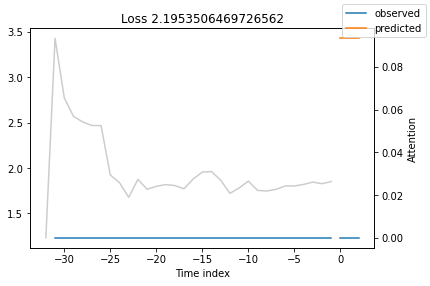

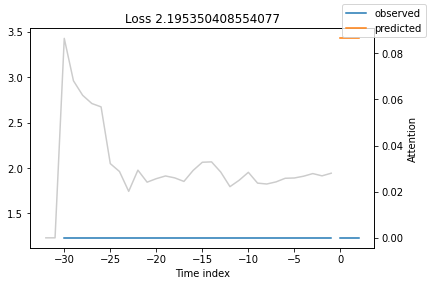

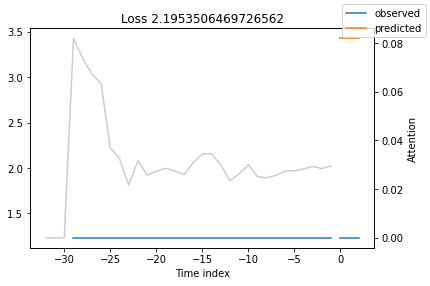

In [17]:
for idx in range(10):  # plot 10 examples
    best_tft.plot_prediction(x, raw_predictions, idx=idx, add_loss_to_title=True);